In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import KFold, cross_val_score


import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
def evaluate_preds(true_values_train, pred_values_train, true_values_test, pred_values_test):
    print('Train:\t' + 'R2 = ' + str(round(r2_score(true_values_train, pred_values_train), 3)) + 
          '\tMAE = ' + str(int(mean_absolute_error(true_values_train, pred_values_train))) +
          '\n' +
          'Test:\t' + 'R2 = ' + str(round(r2_score(true_values_test, pred_values_test), 3)) +
          '\tMAE = ' + str(int(mean_absolute_error(true_values_test, pred_values_test)))
         )
    
    plt.figure(figsize=(16, 6))
       
    plt.subplot(121)
    sns.scatterplot(x=pred_values_train, y=true_values_train)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train: True vs Predicted values');
    
    plt.subplot(122)
    sns.scatterplot(x=pred_values_test, y=true_values_test)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test: True vs Predicted values');

In [3]:
train = pd.read_csv('data_housing_model/train_housing_prepared')
test = pd.read_csv('data_housing_model/test_housing_prepared')
train.drop('Id', axis=1, inplace=True)
test.drop('Id', axis=1, inplace=True)

In [4]:
train_standardized = pd.read_csv('data_housing_model/train_standardized_housing_prepared')
test_standardized = pd.read_csv('data_housing_model/test_standardized_housing_prepared')
train_standardized.drop('Id', axis=1, inplace=True)
test_standardized.drop('Id', axis=1, inplace=True)

In [6]:
y = pd.read_csv('data_housing_model/housing_y')
y.drop('Id', axis=1, inplace=True)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(train, y, 
                                                    test_size=0.25, 
                                                    shuffle=True, 
                                                    random_state=42)

In [8]:
X_train_st, X_test_st, y_train_st, y_test_st = train_test_split(train_standardized, y, 
                                                    test_size=0.25, 
                                                    shuffle=True, 
                                                    random_state=42)

# Линейная регрессия на исходных данных

In [9]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

Train:	R2 = 0.514	MAE = 44740
Test:	R2 = 0.464	MAE = 46054


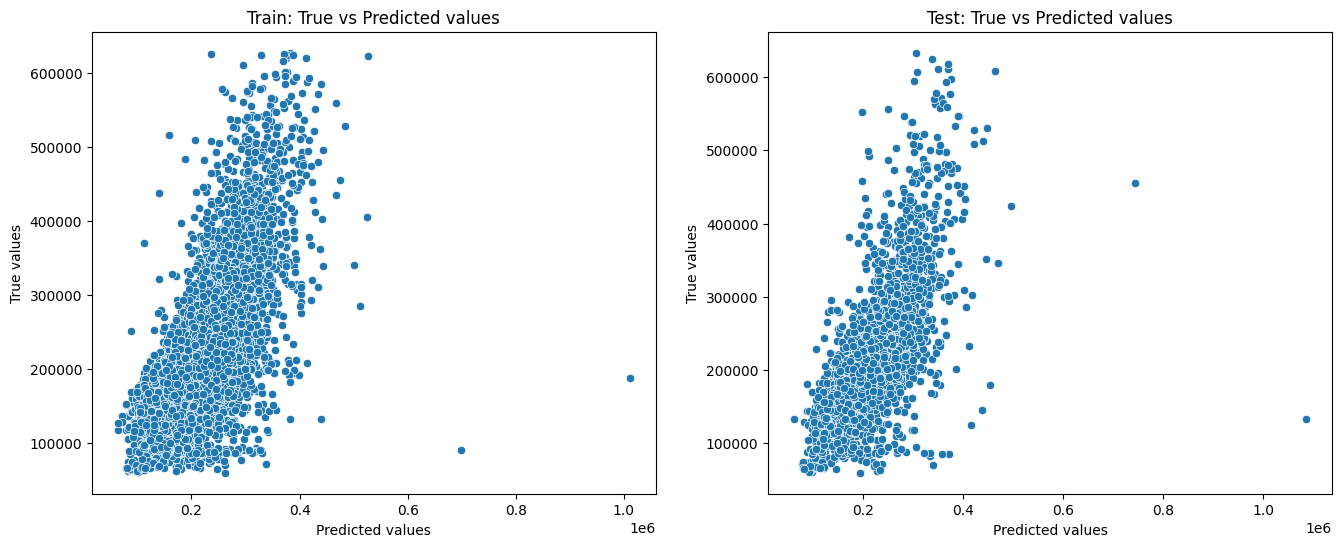

In [10]:
y_train_preds = lr_model.predict(X_train)
y_test_preds = lr_model.predict(X_test)

evaluate_preds(pd.Series(y_train['Price']), y_train_preds.flatten(), pd.Series(y_test['Price']), y_test_preds.flatten())

# Линейная регрессия на стандартизиронных данных

In [11]:
lr_model_st = LinearRegression()
lr_model_st.fit(X_train_st, y_train_st)

LinearRegression()

Train:	R2 = 0.514	MAE = 44740
Test:	R2 = 0.464	MAE = 46054


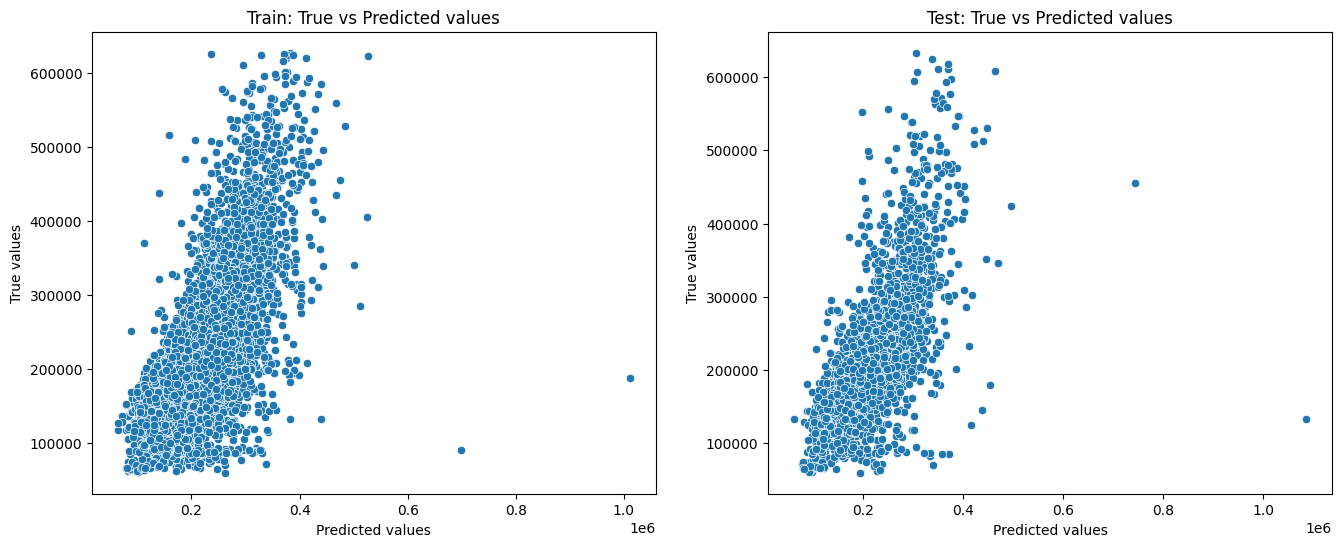

In [12]:
y_train_preds_st = lr_model_st.predict(X_train_st)
y_test_preds_st = lr_model_st.predict(X_test_st)

evaluate_preds(pd.Series(y_train_st['Price']), y_train_preds_st.flatten(), pd.Series(y_test_st['Price']), y_test_preds_st.flatten())

In [13]:
cv = KFold(n_splits=5, random_state=42, shuffle=True)

scores = cross_val_score(lr_model, train, y, cv=cv, scoring='r2', n_jobs=-1)

In [14]:
print('R2 для линейной регрессии на исходных данных = ', round(scores.mean(), 4))

R2 для линейной регрессии на исходных данных =  0.4962


In [15]:
scores_st = cross_val_score(lr_model_st, train_standardized, y, cv=cv, scoring='r2', n_jobs=-1)
print('R2 для линейной регрессии на стандартизированных данных = ', round(scores_st.mean(), 4))

R2 для линейной регрессии на стандартизированных данных =  0.4962
